In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns

In [4]:
california_housing = fetch_california_housing(as_frame=True)

In [5]:
print()
print()
print("frame")
print(california_housing.data.head())
print()
print("target")
print(california_housing.target.head())
print()
print("frame")
print(california_housing.frame.head())
print()
print(type(california_housing.data.head()))
print(type(california_housing.target.head()))
print(type(california_housing.frame.head()))



frame
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

target
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

frame
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073

In [6]:
#optimalmetod to select the bin

import numpy as np

# Function to calculate the number of bins using Freedman-Diaconis Rule
def freedman_diaconis_bin_size(data):
    n = len(data)
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / n ** (1/3)
    bins = np.ceil((data.max() - data.min()) / bin_width)
    return int(bins)

# Generate sample data
np.random.seed(0)
sample_data = np.random.rand(20640) * 100  # generating sample data with 20640 points

# Calculate the number of bins using Freedman-Diaconis Rule
fd_bins = freedman_diaconis_bin_size(sample_data)
print("Freedman-Diaconis number of bins:", fd_bins)

Freedman-Diaconis number of bins: 28


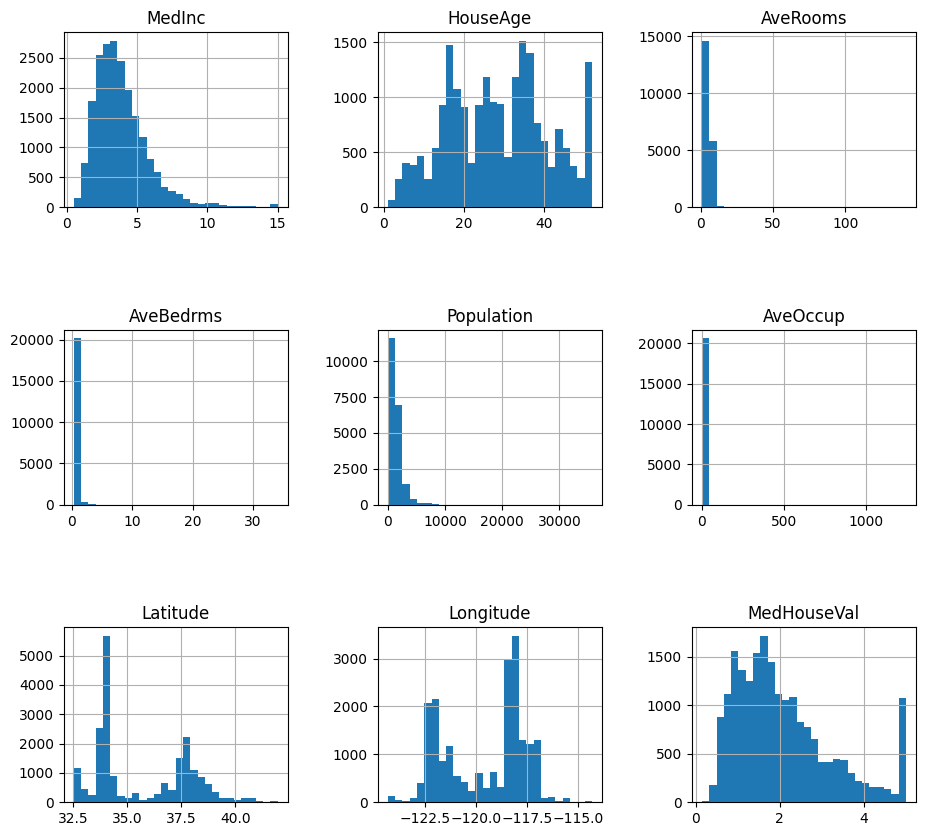

In [7]:
california_housing.frame.hist(figsize = (11,10),bins = 28 )
plt.subplots_adjust(hspace = 0.7 , wspace = 0.4)

In [8]:
# feature selection

In [9]:
#Mutualinformation with SelectPercentile
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest


In [10]:
x = california_housing.frame

In [11]:
y = california_housing.target

In [12]:
feature_name = california_housing.feature_names

In [13]:
x_new1 = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.2)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

1.0
1.0580500016254134e-28


In [16]:
#Mutualinformation with SelectKBest

In [17]:
x_new2 = SelectKBest(mutual_info_regression, k= 3).fit_transform(x, y)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_new2, y, test_size=0.2)

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

1.0
1.7084656921975036e-28


In [20]:
# chisquare
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest

In [21]:
x_new3 = SelectPercentile(chi2, percentile=50).fit_transform(x, y) # CHI CANNOT BE USED AS FELETEURE SELECTION

ValueError: Input X must be non-negative.

In [22]:
# pearsons corelation using f_regression

In [23]:
from sklearn.feature_selection import f_regression, SelectKBest

In [24]:
x_new4 = SelectPercentile(f_regression, percentile=50).fit_transform(x, y)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_new4, y, test_size=0.2)

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5349662034975879
0.6261234931441844


In [27]:
# Analyses relationship b/w the features themselves

In [28]:
M = pd.DataFrame(x,columns=feature_name)

In [29]:
#M=M.corr()

In [30]:
M

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
print( M.iloc[1,0])

8.3014


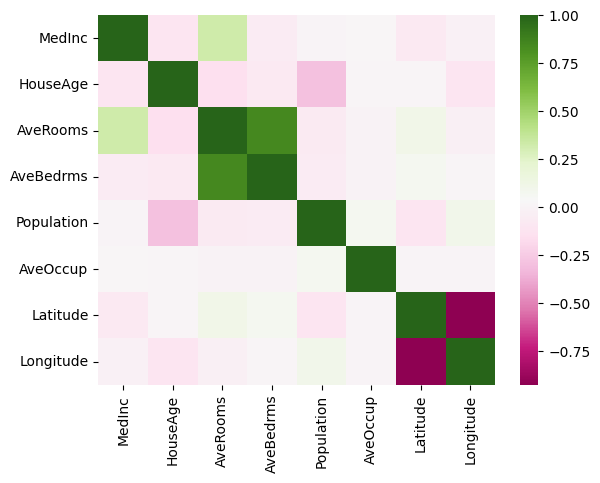

In [32]:
cor =sns.heatmap(M.corr(),cmap="PiYG")

In [33]:
def coorelation(dataset, threshold):
    col_corr = set()
    CORR_MATRIX  = dataset.corr()
    for i in range(len(CORR_MATRIX.columns)):
      #print(i)
      for j in range(i):
        #print(i,j)
        #print(CORR_MATRIX.iloc[i,j])
        if abs(CORR_MATRIX.iloc[i,j]) > threshold:
          colname = CORR_MATRIX.columns[i]
          col_corr.add(colname)
    return col_corr



In [34]:
coorelation(M,0.7)

{'AveBedrms', 'Longitude'}

In [35]:
def coorelation2(dataset, threshold):
    col_corr = set()
    CORR_MATRIX  = dataset.corr()
    for i in range(len(CORR_MATRIX.columns)):
      #print(i)
      for j in range(i):
        #print(i,j)
        #print(CORR_MATRIX.iloc[i,j])
        if (CORR_MATRIX.iloc[i,j]) > threshold:
          colname = CORR_MATRIX.columns[i]
          col_corr.add(colname)
    return col_corr


In [36]:
coorelation2(M,0.7)

{'AveBedrms'}

In [37]:
x_new5 = M.drop(['AveBedrms', 'Longitude'], axis=1)
x_new5.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,565.0,2.181467,37.85


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_new5, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5146750230831978




```
Wrapper Based Methods
```



In [39]:
x = california_housing.frame

In [40]:
y = california_housing.target

In [41]:
estimator = Lasso()
x_new6 = RFE(estimator, n_features_to_select=5, step=1).fit_transform(x, y)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_new6, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

1.0


In [43]:
#SFE
x = california_housing.frame
y = california_housing.target

In [44]:
ridge  = RidgeCV().fit(x,y)

In [45]:
x_new8 = SequentialFeatureSelector(ridge, n_features_to_select=5, direction='forward').fit_transform(x, y)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_new8 , y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

1.0


In [51]:
# appllying it with k fold and stratified k fold -
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LassoCV

In [48]:
x = california_housing.frame
y = california_housing.target

In [56]:
# need to understaand

In [66]:
from sklearn.decomposition import PCA
X_new11 = PCA(n_components=7, svd_solver='full').fit_transform(x)
print(X_new11.shape)

(20640, 7)


In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_new11, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.981456603146056
